# Illustration to Vec

In [1]:
import i2v
from PIL import Image
import os
import glob
import matplotlib.pyplot as plt
import torchvision
import numpy as np
import torch

In [2]:
illust2vec = i2v.make_i2v_with_chainer(
    "i2v_extra/illust2vec_tag_ver200.caffemodel", "i2v_extra/tag_list.json")

In [3]:
source = '/home/joel/Documents/AnimeFace_Customization/data/danbooru-faces-exact-64'
files = glob.glob(os.path.join(source, '*/*.jpg')); len(files)

101289

/home/joel/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


[{'monochrome': 0.01582103967666626}]


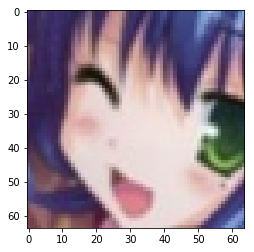

In [4]:
img = Image.open(files[1])
plt.imshow(img)
print(illust2vec.estimate_specific_tags([img], ["monochrome"]))

## Check if monochrome

In [5]:
mono = "/home/joel/Documents/AnimeFace_Customization/data/danbooru-faces-64/0000/10000_0.jpg"
color = "/home/joel/Documents/AnimeFace_Customization/data/danbooru-faces-64/0000/6000_0.jpg"

mono = Image.open(mono)
color = Image.open(color)

mono = np.array(mono)
color = np.array(color)

FileNotFoundError: [Errno 2] No such file or directory: '/home/joel/Documents/AnimeFace_Customization/data/danbooru-faces-64/0000/10000_0.jpg'

In [7]:
def check(img):
    if np.max(np.std(img, axis=2)) < 15:
        return True
    else: return False

In [8]:
imgs = []
for file in files:
    img = Image.open(file)
    img = np.array(img)
    if check(img):
        imgs.append(img)
    if len(imgs) == 64: break

In [9]:
imgs = np.array(imgs); imgs.shape

(64, 64, 64, 3)

In [10]:
tensor = torch.from_numpy(np.transpose(imgs,(0, 3, 1, 2))); tensor.shape

torch.Size([64, 3, 64, 64])

In [11]:
grid = torchvision.utils.make_grid(tensor, nrow=16); grid.shape

torch.Size([3, 266, 1058])

In [12]:
grid = np.transpose(grid.numpy(), (1, 2, 0))

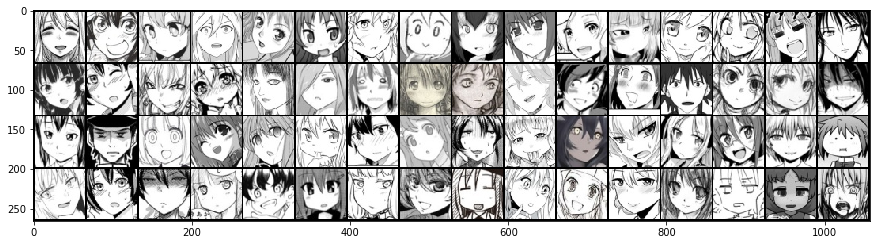

In [13]:
plt.figure(figsize=(15, 12))
plt.imshow(grid)

## Delete Monochromes

In [14]:
deleted = 0
passed=0
    
for file in files:
    img = Image.open(file)
    img = np.array(img)
    passed += 1
    if check(img):
        os.remove(file)
        deleted +=1
        if (deleted%1000 == 0):
            print(deleted, passed)

1000 15662
2000 32574
3000 48573
4000 64363
5000 78908
6000 95657
